# **Assignment2-Machine Learning**

## **1 Simple Correlation Analysis**

Feature Selection and Dataset Preparation:
* Based on the earlier EDA, we have identified population, income, education, and other factors that might be important predictors of IRSD.
* We select relevant columns related to population characteristics, education, residential status, cultural background, and minority representation.
* Next we will use correlation analysis to determine the relationships between the selected features and IRSD.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Data/communities.csv')

columns_of_interest = [
    'IRSD (avg)', 
    'Equivalent household income <$600/week', 
    'Personal income <$400/week, persons', 
    'Unemployed, persons', 
    'Public Housing Dwellings',
    '% dwellings which are public housing',
    'Primary school students', 
    'Secondary school students', 
    'TAFE students', 
    'Holds degree or higher, persons', 
    'Did not complete year 12, persons',
    'Population Density',
    'Distance to GPO (km)',  
    'Dwellings with no motor vehicle',
    'Dwellings with no internet',
    'Born overseas, persons', 
    'Born in non-English speaking country, persons', 
    'Speaks LOTE at home, persons',
    'Aboriginal or Torres Strait Islander, persons',
    'Poor English proficiency, persons',
    '2012 ERP age 0-4, persons', 
    '2012 ERP age 5-9, persons', 
    '2012 ERP age 10-14, persons', 
    '2012 ERP age 15-19, persons', 
    '2012 ERP age 20-24, persons', 
    'Public hospital separations, 2012-13',
    'Travel time to nearest public hospital',
    'Primary Schools', 
    'Secondary Schools'
]

for col in columns_of_interest:
    if col not in df.columns:
        print(f"Column '{col}' does not exist in the data")

df_filtered = df[[col for col in columns_of_interest if col in df.columns]].copy()

df_filtered.replace('<5', 5, inplace=True)

for col in df_filtered.columns:
    if df_filtered[col].isnull().sum() > 0:
        df_filtered[col] = df_filtered[col].fillna(df_filtered[col].median())

correlation_matrix = df_filtered.corr()

irsd_correlations = correlation_matrix['IRSD (avg)'].sort_values(ascending=False)

pd.set_option('display.max_rows', None)  
print(irsd_correlations)

IRSD (avg)                                       1.000000
Holds degree or higher, persons                  0.238098
Population Density                               0.152509
Primary school students                          0.087607
Secondary school students                        0.081053
2012 ERP age 10-14, persons                      0.060856
2012 ERP age 5-9, persons                        0.060523
2012 ERP age 15-19, persons                      0.052011
2012 ERP age 20-24, persons                      0.039232
2012 ERP age 0-4, persons                        0.023887
Born overseas, persons                          -0.008502
Travel time to nearest public hospital          -0.019597
TAFE students                                   -0.034866
Personal income <$400/week, persons             -0.047917
Primary Schools                                 -0.051335
Born in non-English speaking country, persons   -0.053694
Dwellings with no motor vehicle                 -0.058276
Did not comple

| Feature                                  | Correlation Index | Analysis                                                                                                                                   |
|------------------------------------------|-------------------|--------------------------------------------------------------------------------------------------------------------------------------------|
| % dwellings which are public housing     | -0.429            | Public housing proportion is a strong indicator of socio-economic disadvantage.                                                           |
| Distance to GPO (km)                     | -0.332            | Distance from the city center is associated with economic underdevelopment, as remote areas may lack access to resources and opportunities.|
| Public Housing Dwellings                 | -0.284            | The number of public housing dwellings indicates communities that might rely on public welfare, often associated with socio-economic disadvantage. |
| Equivalent household income <$600/week   | -0.146            | The proportion of low-income households indicates economic hardship and socio-economic disadvantage.                                       |
| Poor English proficiency, persons        | -0.170            | Poor language proficiency is strongly associated with socio-economic disadvantage, affecting access to education and employment opportunities. |
| Dwellings with no internet               | -0.174            | Lack of internet access reflects digital exclusion, often linked to socio-economic disadvantage.                                           |
| Aboriginal or Torres Strait Islander, persons | -0.193          | Areas with higher Indigenous populations often face socio-economic disadvantages, indicating systemic challenges.                         |
| Holds degree or higher, persons          | 0.238             | Higher educational attainment is a strong indicator of socio-economic advantage.                                                          |
| Population Density                       | 0.153             | Higher population density is often associated with better socio-economic status due to concentration of resources and opportunities.       |

In [3]:
columns_of_ml = [
    'IRSD (avg)', 
    '% dwellings which are public housing', 
    'Distance to GPO (km)', 
    'Public Housing Dwellings', 
    'Equivalent household income <$600/week',
    'Poor English proficiency, persons',
    'Dwellings with no internet',
    'Aboriginal or Torres Strait Islander, persons',
    'Holds degree or higher, persons',
    'Population Density'
]

for col in columns_of_ml:
    if col not in df.columns:
        print(f"Column '{col}' does not exist in the data")


In [4]:
df_filtered = df[[col for col in columns_of_ml if col in df.columns]].copy()

X = df_filtered.drop(columns=['IRSD (avg)'])
y = df_filtered['IRSD (avg)']


In [5]:
X.head() # Features 


,% dwellings which are public housing,Distance to GPO (km),Public Housing Dwellings,Equivalent household income <$600/week,"Poor English proficiency, persons",Dwellings with no internet,"Aboriginal or Torres Strait Islander, persons","Holds degree or higher, persons",Population Density
0,3.815789,4.264157,87,400,305,246,16,1784,3082.440714
1,4.684173,9.881527,66,265,45,193,12,877,2426.665450
2,NaN,134.213743,<5,31,<5,17,8,73,0.841522
3,1.226598,124.859887,19,137,<5,68,8,245,213.059443
4,NaN,14.758418,<5,121,14,64,7,84,210.819042


In [6]:
y.head() # Label: IRSD(avg)

0    1054.014288
1    1087.153516
2    1061.326811
3    1056.031657
4    1033.615698
Name: IRSD (avg), dtype: float64

In [7]:
# Load the filtered features and target data

X.to_csv('Data/features_X.csv', index=False)
y.to_csv('Data/target_y.csv', index=False)

## **2 Data Preparation**

* Ensure all missing or invalid values are handled.
* Perform data normalization if required, especially if we plan to use algorithms like linear regression or KNN that are sensitive to data scales.

### **(1) Check for missing values in the dataset**

In [8]:
# Load the filtered features and target data
X = pd.read_csv('Data/features_X.csv')
y = pd.read_csv('Data/target_y.csv')



In [9]:
# Check for missing values
print("\nChecking for missing values in the dataset:")
print(X.isnull().sum())



Checking for missing values in the dataset:
% dwellings which are public housing             427
Distance to GPO (km)                               0
Public Housing Dwellings                           0
Equivalent household income <$600/week             0
Poor English proficiency, persons                  0
Dwellings with no internet                         0
Aboriginal or Torres Strait Islander, persons      0
Holds degree or higher, persons                    0
Population Density                                 0
dtype: int64


In [10]:
# Convert non-numeric values like '<5' to numeric 
X.replace('<5', 5, inplace=True)

# Convert all columns to numeric if possible
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')



In [11]:
# Check for missing values in the dataset
if X.isnull().sum().any() or y.isnull().sum().any():
    print("There are missing values in the dataset. Handling missing values now.")
    # Fill missing values with median for numerical features
    for col in X.select_dtypes(include=['number']).columns:
        X[col].fillna(X[col].median(), inplace=True)
    # Fill missing values with mode for categorical features (if any)
    for col in X.select_dtypes(include=['object']).columns:
        X[col].fillna(X[col].mode()[0], inplace=True)

There are missing values in the dataset. Handling missing values now.


/var/folders/3m/088n1dfd0sb6mhkppf4vd2dr0000gn/T/ipykernel_42860/4201044984.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)


### **(2) Removal collinearity**


In [12]:
# Calculate correlation matrix to identify collinear features
correlation_matrix = X.corr().abs()

# Select the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Debug: Print the upper triangle of the correlation matrix
print("\nUpper Triangle of Correlation Matrix:")
upper_triangle




Upper Triangle of Correlation Matrix:


,% dwellings which are public housing,Distance to GPO (km),Public Housing Dwellings,Equivalent household income <$600/week,"Poor English proficiency, persons",Dwellings with no internet,"Aboriginal or Torres Strait Islander, persons","Holds degree or higher, persons",Population Density
% dwellings which are public housing,NaN,0.053928,0.639015,0.184397,0.137929,0.202796,0.222425,0.017475,0.187085
Distance to GPO (km),NaN,NaN,0.123699,0.195515,0.280560,0.160891,0.090628,0.370361,0.497407
Public Housing Dwellings,NaN,NaN,NaN,0.701377,0.475657,0.723150,0.631942,0.406994,0.328614
Equivalent household income <$600/week,NaN,NaN,NaN,NaN,0.709704,0.975595,0.674283,0.663377,0.326698
"Poor English proficiency, persons",NaN,NaN,NaN,NaN,NaN,0.677571,0.269453,0.544159,0.376646
Dwellings with no internet,NaN,NaN,NaN,NaN,NaN,NaN,0.704293,0.614944,0.304507
"Aboriginal or Torres Strait Islander, persons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229075,0.026501
"Holds degree or higher, persons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593830
Population Density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Find features with correlation greater than 0.9 and remove them
collinear_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print(f"\nCollinear features to be removed: {collinear_features}")

# Drop collinear features
X = X.drop(columns=collinear_features)

# Debug: Check the remaining features
print("\nRemaining features after removing collinear features:")
print(X.columns)


Collinear features to be removed: ['Dwellings with no internet']

Remaining features after removing collinear features:
Index(['% dwellings which are public housing', 'Distance to GPO (km)',
       'Public Housing Dwellings', 'Equivalent household income <$600/week',
       'Poor English proficiency, persons',
       'Aboriginal or Torres Strait Islander, persons',
       'Holds degree or higher, persons', 'Population Density'],
      dtype='object')


Base on the output:

*Dwellings with no internet* were removed because it had a high collinearity (correlation greater than 0.9) with other features, meaning it provided duplicate information with one or more other features. If it continues to be retained, it may result in multicollinearity in the model, which affects the stability and accuracy of the model.

### **(3) Standardizing**

In [14]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
# Debug: Check the mean and standard deviation after scaling
print("\nTraining set mean after scaling:", X_scaled.mean(axis=0))
print("Training set standard deviation after scaling:", X_scaled.std(axis=0))



Training set mean after scaling: [ 1.97372982e-17  9.21073917e-17  2.30268479e-17 -6.00342821e-17
 -1.64477485e-18 -3.28954970e-18  1.97372982e-17 -1.18423789e-16]
Training set standard deviation after scaling: [1. 1. 1. 1. 1. 1. 1. 1.]


Check the feature mean and standard deviation of the training and test sets to ensure that they are normalized (mean 0, standard deviation 1).

### **(4) Data Partitioning (70/30)**


In [16]:
# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the training set into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Debug: Check the sizes of each dataset
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (604, 8)
Validation set shape: (152, 8)
Test set shape: (324, 8)


In [17]:
# Check for missing values in the training and testing sets
if X_train.isnull().sum().any() or y_train.isnull().sum().any():
    print("There are missing values in the training set. Handling missing values now.")
    X_train.fillna(X_train.median(), inplace=True)
    y_train.fillna(y_train.median(), inplace=True)

if X_test.isnull().sum().any() or y_test.isnull().sum().any():
    print("There are missing values in the testing set. Handling missing values now.")
    X_test.fillna(X_test.median(), inplace=True)
    y_test.fillna(y_test.median(), inplace=True)

There are missing values in the training set. Handling missing values now.


In [18]:
print("Number of missing values in X_train:", X_train.isnull().sum().sum())
print("Number of missing values in y_train:", y_train.isnull().sum().sum())

Number of missing values in X_train: 0
Number of missing values in y_train: 0


## **3 Model Training**

### **(1) Linear Regression**

In [19]:
model = LinearRegression()

# Train the model with the training set
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Print model coefficients
print("\nModel coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [[-4.63708230e+00 -2.25143119e-01  2.56991234e-02 -3.40621470e-02
  -3.42191251e-02  7.85105129e-02  2.26538595e-02 -2.93843507e-03]]
Model intercept: [1064.68608172]


In [21]:
# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate MSE and R² score
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print validation metrics
print("\nValidation Set Metrics:")
print(f"Mean Squared Error (MSE): {val_mse}")
print(f"R² Score: {val_r2}")

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate MSE and R² score for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print test set metrics
print("\nTest Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R² Score: {test_r2}")


Validation Set Metrics:
Mean Squared Error (MSE): 2785.911826562375
R² Score: 0.3960944983462573

Test Set Metrics:
Mean Squared Error (MSE): 2992.5656258006697
R² Score: 0.4426969846249328


From the output:

1. The Mean Squared Error (MSE) value on the validation set is high, and the R² Score also indicates that the explanatory power of the model is not strong, only 0.396, which means that the model can only explain about 39.6% of the data variation.

2. The Mean Squared Error (MSE) on the test set was 2992.57 and the R² Score was 0.4427, indicating that the model performed slightly better on the test set than on the validation set, but still not very good overall.

### **(2) Ridge Regression**

In [22]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Ridge regression with alpha value (regularization strength)
ridge_model = Ridge(alpha=1.0)

# Train the Ridge model
ridge_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = ridge_model.predict(X_val)

# Calculate MSE and R² score for validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print validation metrics
print("\nRidge Regression Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {val_mse}")
print(f"R² Score: {val_r2}")


Ridge Regression Validation Set Metrics:
Mean Squared Error (MSE): 2785.901710378598
R² Score: 0.3960966912437426


### **(3) Lasso Regression**

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Define the Lasso model
lasso_model = Lasso()

# Define a parameter grid to tune the alpha parameter
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='r2', cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_lasso = grid_search.best_estimator_

# Predict on validation and test sets
y_val_pred = best_lasso.predict(X_val)
y_test_pred = best_lasso.predict(X_test)

# Calculate and print metrics for validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print("\nLasso Regression Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {val_mse}")
print(f"R² Score: {val_r2}")

# Calculate and print metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nLasso Regression Test Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R² Score: {test_r2}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ........................................

### **(4) Gradient Boosting Regresssion**


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model with the training set
gbr_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = gbr_model.predict(X_val)

# Calculate and print MSE and R² score
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print("\nGradient Boosting Regressor Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {val_mse}")
print(f"R² Score: {val_r2}")


Gradient Boosting Regressor Validation Set Metrics:
Mean Squared Error (MSE): 1327.9228541016728
R² Score: 0.7121445446630379


/Users/yueyangwu/opt/anaconda3/envs/Desktop/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### **(5) Random Forest**


Random Forest Regressor Model:


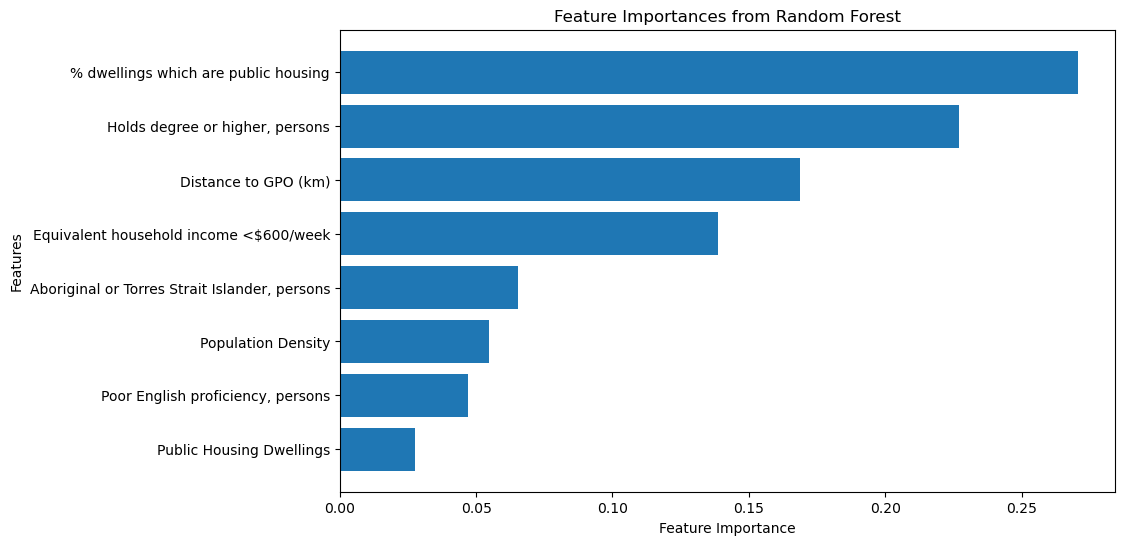

In [25]:
import re
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

print("\nRandom Forest Regressor Model:")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  
plt.show()



In [ ]:

y_val_pred_rf = rf_model.predict(X_val)

val_mse_rf = mean_squared_error(y_val, y_val_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)

print("\nRandom Forest Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {val_mse_rf}")
print(f"R² Score: {val_r2_rf}")

The ranking of these features shows their influence on model predictions, with % dwellings which are public housing and Holds degree or higher, persons being the two most important features. This suggests that the proportion of public housing and the number of highly educated people have a large impact on IRSD.

### **(6) XGBoost Model**

In [26]:

print("\nXGBoost Model:")

X_train.columns = [re.sub(r'[<>\[\]]', '', col) for col in X_train.columns]
X_val.columns = [re.sub(r'[<>\[\]]', '', col) for col in X_val.columns]
X_test.columns = [re.sub(r'[<>\[\]]', '', col) for col in X_test.columns]

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train.values.ravel())

y_val_pred = xgb_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print("\nXGBoost Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {val_mse}")
print(f"R² Score: {val_r2}")




XGBoost Model:

XGBoost Validation Set Metrics:
Mean Squared Error (MSE): 1269.1059004312162
R² Score: 0.7248943673865844


In [27]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest and XGBoost models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Convert y_train to NumPy array and use ravel() to flatten it
y_train_np = y_train.values.ravel()

# Train both models on the training set
rf_model.fit(X_train, y_train_np)
xgb_model.fit(X_train, y_train_np)

# Predict on validation set using both models
y_val_pred_rf = rf_model.predict(X_val)
y_val_pred_xgb = xgb_model.predict(X_val)

# Weighted ensemble of Random Forest and XGBoost
# Assign 50% weight to each model (can be adjusted)
y_val_pred_ensemble = 0.5 * y_val_pred_rf + 0.5 * y_val_pred_xgb

# Calculate MSE and R² score for ensemble model
ensemble_mse = mean_squared_error(y_val, y_val_pred_ensemble)
ensemble_r2 = r2_score(y_val, y_val_pred_ensemble)

print("\nEnsemble Model Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {ensemble_mse}")
print(f"R² Score: {ensemble_r2}")


Ensemble Model Validation Set Metrics:
Mean Squared Error (MSE): 1355.3701869740514
R² Score: 0.7061947528680103


In [28]:
# Adjusted Weighted ensemble of Random Forest and XGBoost
# Assigning different weights to each model
weight_rf = 0.4  # Adjust weight as needed
weight_xgb = 0.6  # Adjust weight as needed

y_val_pred_ensemble_adjusted = weight_rf * y_val_pred_rf + weight_xgb * y_val_pred_xgb

# Calculate MSE and R² score for adjusted ensemble model
ensemble_mse_adjusted = mean_squared_error(y_val, y_val_pred_ensemble_adjusted)
ensemble_r2_adjusted = r2_score(y_val, y_val_pred_ensemble_adjusted)

print("\nAdjusted Ensemble Model Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {ensemble_mse_adjusted}")
print(f"R² Score: {ensemble_r2_adjusted}")


Adjusted Ensemble Model Validation Set Metrics:
Mean Squared Error (MSE): 1329.60941856795
R² Score: 0.7117789460283763


## Model Performance Comparison

| Model                           | Dataset        | Mean Squared Error (MSE) | R² Score | Analysis                                                                                                         |
|---------------------------------|----------------|--------------------------|----------|------------------------------------------------------------------------------------------------------------------|
| **Linear Regression**           | Validation Set | 2785.91                  | 0.396    | R² is low, suggesting the model explains only ~39% to 44% of the variance. Linear relationships are insufficient. |
|                                 | Test Set       | 2992.57                  | 0.443    |                                                                                                                  |
| **Ridge Regression**            | Validation Set | 2785.90                  | 0.396    | Performance is almost identical to Linear Regression, indicating regularization did not provide significant improvement. |
| **Lasso Regression**            | Test Set       | 3005.56                  | 0.440    | Feature selection did not improve performance over Linear and Ridge Regression. Consider further hyperparameter tuning or retaining more features. |
| **Gradient Boosting Regressor** | Validation Set | 1327.92                  | 0.712    | Significant improvement with R² of 0.71, indicating better ability to capture complex relationships.            |
| **XGBoost**                     | Validation Set | 1269.11                  | 0.725    | Slightly better performance than Gradient Boosting, indicating strength in handling complex and nonlinear data.  |
| **Ensemble Model**              | Validation Set | 1355.37 (50% weight)     | 0.706    | Combines Random Forest and XGBoost, but performance did not exceed XGBoost alone.                               |
|                                 | Validation Set | 1329.61 (Adjusted weight)| 0.712    | Adjusted weights slightly improved the performance, but gains were limited.                                      |

The R² score of the gradient-enhanced regressor improved significantly to 0.712, indicating that it is better able to capture complex relationships between features.

XGBoost performed slightly better than the gradient enhanced regressor (R² 0.725), showing its advantage in handling complex relationships and non-linear data. Therefore, XGBoost can be further optimized as the current benchmark model.

/Users/yueyangwu/opt/anaconda3/envs/Desktop/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


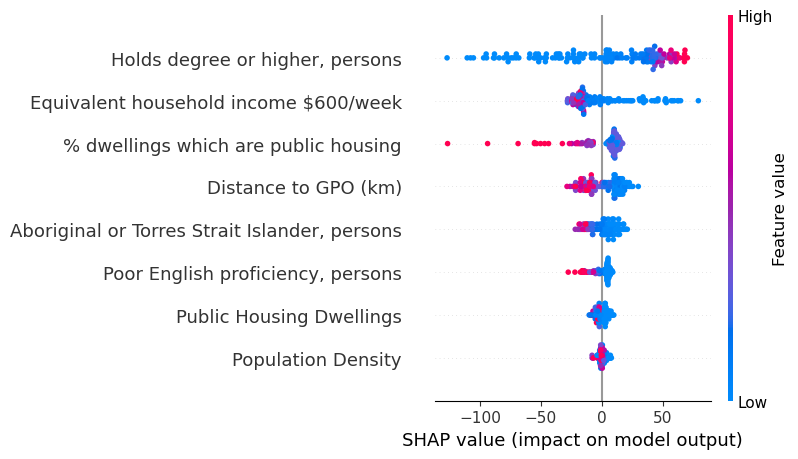

In [29]:
import shap

# Random Forest
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_val)

shap.summary_plot(shap_values, X_val)

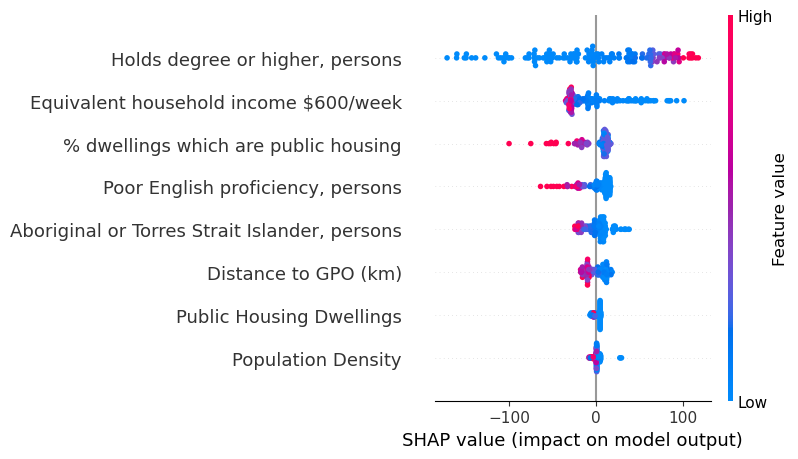

In [30]:
import shap

# XGBoost
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_val)
shap.summary_plot(shap_values, X_val)

Holds degree or higher,  Characteristics such as persons, Equivalent household income <$600/week, and % dwellings which are public housing have a great impact on the prediction of the model, especially the distribution of blue dots and red dots is more significant on these characteristics.


As can be seen from the figure, for example, if the Holds degree or higher, persons, the higher the eigenvalue is (red dot), the influence on IRSD is more negative. The lower the eigenvalue (blue dot), the more positive it is, the lower the IRSD, the lower the socio-economic disadvantage of the community.

## **4 Hyperparameter tuning**

### **(1) RandomizedSearchCV**

We used RandomizedSearchCV to optimize the hyperparameters of the XGBoost model, in order to find a more suitable combination of hyperparameters for the data, so as to improve the performance of the model.

* n_estimators: Control the number of trees in the model, the more trees, the more complex the model; But too many trees can lead to overfitting.
* learning_rate: Determines the contribution size of each tree, a smaller learning rate requires more trees to fit the data, a larger learning rate may converge faster, but it is easy to overfit.
* max_depth: The depth of each tree is controlled. A larger depth will increase the complexity of the model, but may overfit; Smaller depths may underfit.

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [32]:
# RandomForest
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1
)
rf_random_search.fit(X_train, y_train.values.ravel())
best_rf_model = rf_random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END max_dep

In [ ]:

xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],  # L1 
    'reg_lambda': [0.5, 1, 2]        # L2 
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1  
)
random_search.fit(X_train, y_train_np)
best_xgb_model = random_search.best_estimator_

### **(2) StackingRegressor**

We use StackingRegressor for stack integration, with the aim of leveraging predictions from multiple models and combining the strengths of different models to improve overall predictive performance.

The structure of the stacked model:
* Base Learners: RandomForestRegressor and XGBRegressor.
* Final Estimator: Use a linear regression model as the final predictor.

In [ ]:

estimators = [
    ('rf', best_rf_model),
    ('xgb', best_xgb_model)
]

stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train.values.ravel())


### **(3) Evaluation**

In [ ]:
# Make predictions and evaluate on validation sets

y_val_pred = stacking_model.predict(X_val)

val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("\nStacking Regressor Validation Set Metrics:")
print(f"Mean Squared Error (MSE): {val_mse}")
print(f"R² Score: {val_r2}")

In [ ]:
# Make predictions and evaluate on train sets

y_test_pred = stacking_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nStacking Regressor Test Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R² Score: {test_r2}")

In [ ]:
# Make predictions and evaluate on train sets

scores = cross_val_score(stacking_model, X_train, y_train.values.ravel(), cv=10, scoring='r2')
print(f"\n10-Fold Cross Validation R² Scores: {scores}")
print(f"Mean R² Score: {scores.mean()}")

From the results, the performance of Stacking Regressor is significantly improved compared with other models

### Stacking Regressor Performance Metrics

| Metric                        | Value                   |
|-------------------------------|-------------------------|
| Validation Set MSE            | 1075.44                 |
| Validation Set R² Score       | 0.767                   |
| Test Set MSE                  | 1090.46                 |
| Test Set R² Score             | 0.797                   |
| 10-Fold Cross Validation R²   | [0.855, 0.618, 0.837, 0.635, 0.703, 0.804, 0.789, 0.849, 0.810, 0.838] |
| Mean Cross Validation R² Score| 0.774                   |